In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df=pd.read_csv('House_price_cleaned.csv')

In [121]:
df.shape

(2559, 18)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Superficie            2559 non-null   object
 1   Rooms                 2559 non-null   object
 2   Bedrooms              2559 non-null   object
 3   Price                 2559 non-null   object
 4   Location              2559 non-null   object
 5   description           2559 non-null   object
 6   Loc_Paris             2559 non-null   int64 
 7   m2                    2559 non-null   int64 
 8   nb_bat                2559 non-null   int64 
 9   nb_good               2559 non-null   object
 10  nb_bain               2559 non-null   int64 
 11  Cave                  2559 non-null   int64 
 12  balc_terr             2559 non-null   object
 13  Chauffage             2559 non-null   object
 14  Rénové                2559 non-null   int64 
 15  Parking               2559 non-null   

In [123]:
df=df[~(df.Price=='Nous consulter')]

In [124]:
#I want the column price to be numeric
df['Price_int']=df.Price.apply(lambda x: int(x.strip().replace(' ','')))
#I Want the column Loc_Paris to be treated as a categorical variable
df['Loc_Paris']=df.Loc_Paris.apply(lambda x: str(x))



In [125]:
#transform nb_good into a numerical feature
df['nb_good']=df.nb_good.apply(lambda x: int(x.replace('e','').replace('r','')))
df.nb_good.value_counts()

1     529
2     467
4     397
3     382
5     321
6     231
7      99
8      48
9      27
10     11
15      8
11      8
18      5
12      5
13      4
29      2
30      2
28      1
24      1
22      1
20      1
16      1
25      1
17      1
19      1
21      1
23      1
32      1
Name: nb_good, dtype: int64

In [126]:
#Let us create one other feature that could be interesting: 'Last_etage'
df['Last_etage']= df.apply(lambda x: 1 if x.nb_bat==x.nb_good else 0,axis=1)
df.Last_etage.value_counts()

0    2094
1     463
Name: Last_etage, dtype: int64

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557 entries, 0 to 2558
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Superficie            2557 non-null   object
 1   Rooms                 2557 non-null   object
 2   Bedrooms              2557 non-null   object
 3   Price                 2557 non-null   object
 4   Location              2557 non-null   object
 5   description           2557 non-null   object
 6   Loc_Paris             2557 non-null   object
 7   m2                    2557 non-null   int64 
 8   nb_bat                2557 non-null   int64 
 9   nb_good               2557 non-null   int64 
 10  nb_bain               2557 non-null   int64 
 11  Cave                  2557 non-null   int64 
 12  balc_terr             2557 non-null   object
 13  Chauffage             2557 non-null   object
 14  Rénové                2557 non-null   int64 
 15  Parking               2557 non-null   

In [128]:
df.describe()

,m2,nb_bat,nb_good,nb_bain,Cave,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage
count,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2.557000e+03,2557.000000
mean,74.482597,6.705905,3.673445,0.675401,0.583887,0.082127,0.124364,0.232695,0.216269,1.025951e+06,0.181072
std,57.248089,3.586994,2.815973,0.748128,0.493009,0.274613,0.330061,0.422632,0.411780,1.052927e+06,0.385153
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,0.000000
25%,36.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.400000e+05,0.000000
50%,60.000000,6.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.200000e+05,0.000000
75%,94.000000,7.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.249000e+06,0.000000
max,855.000000,33.000000,32.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.970000e+07,1.000000


In [129]:
#outlier detected. Indeed one apartment seem to be 4m². Let us explore it. let's drop it since such an apartment seems weird.
df=df[~(df.m2==4)]

In [130]:
df.columns

Index(['Superficie', 'Rooms', 'Bedrooms', 'Price', 'Location', 'description',
       'Loc_Paris', 'm2', 'nb_bat', 'nb_good', 'nb_bain', 'Cave', 'balc_terr',
       'Chauffage', 'Rénové', 'Parking', 'Chauffage_Central',
       'Chauffage_Individuel', 'Price_int', 'Last_etage'],
      dtype='object')

In [131]:
#numerical variables
num=['m2','Price_int']

#categorical variables
cat=['Rooms', 'Bedrooms','nb_bat', 'nb_good', 'nb_bain','nb_good','balc_terr','Loc_Paris','Cave','Rénové', 'Parking', 'Chauffage_Central',
       'Chauffage_Individuel','Last_etage']

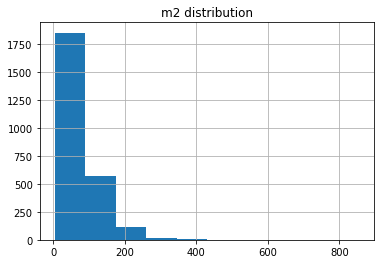

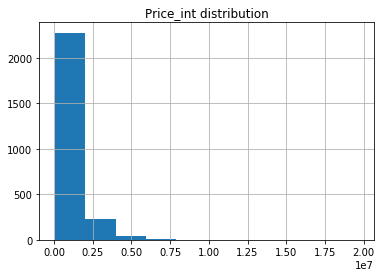

In [132]:
for i in num:
    df[i].hist()
    plt.title(f'{i} distribution')
    plt.show()

In [133]:
#m2, Price_int are not normally distributed. We will need to normalize to use some regression techniques.
#Let us check the skewness of the target variable
df.Price_int.skew()


5.227121216725825

In [134]:
# We will use the log trnasformation on the Price_int column.
df.Price_int=np.log(df.Price_int)
df.Price_int.skew()

0.013115656372727604

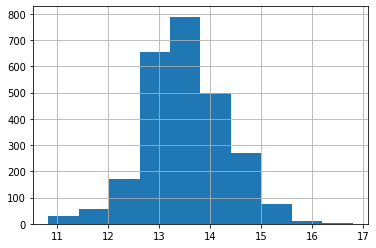

In [135]:
#Now the column is way more close to the normal distribution
df.Price_int.hist()

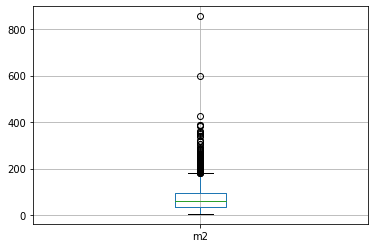

In [136]:
df.boxplot(column='m2')

In [137]:
# It seems that there are a lot of outliers. Let us check them.
df[df.m2>400]

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage
1276,600m²,3 p.,2 p.,1 210 000,Paris 07 (75007)\nParis 7ème,Ref de l'annonce\n:W-02HKWB\nEtage du bien\n:1...,75007,600,7,1,2,0,0,Unknown,0,0,0,0,14.006131,0
2194,855m²,16 p.,12 p.,19 700 000,Paris 16 (75016)\nParis,Ref de l'annonce\n:JARDIN FLANDRIN\nRénové\nCh...,75016,855,6,1,10,1,"Terrasse, balcon",Individuel,1,1,0,1,16.796129,0
2387,428m²,8 p.,4 p.,5 300 000,Paris 16 (75116)\nParis,Ref de l'annonce\n:OA091FPCL3\nChauffage\n:Cen...,75016,428,6,3,2,1,Balcon,Central,0,1,1,0,15.483217,0


In [138]:
# 3 piece for 600m² it seems weird. Lets drop it. 800m² and 428m² is also very unusual, let us drop it. 
df=df[~(df.m2>400)]

In [139]:
#Still checking the outliers
df[df.m2<7]

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage
871,5m²,1 p.,0 p.,600 000,Paris 01 (75001)\nPlace-Vendôme,Ref de l'annonce\n:3901687\nEtage du bien\n:2e...,75001,5,4,2,0,0,0,Unknown,0,0,0,0,13.304685,0
885,5m²,1 p.,1 p.,85 150,Paris 10 (75010)\nLouis Blanc|aqueduc,Ref de l'annonce\n:805877\nChauffage\n:Individ...,75010,5,6,6,0,0,0,"Individuel, électrique",0,0,0,1,11.352170,1
988,6m²,1 p.,0 p.,70 000,Paris 10 (75010)\nCHÂTEAU Landon,Ref de l'annonce\n:31751476\nEtage du bien\n:6...,75010,6,6,6,0,0,0,Unknown,0,0,0,0,11.156251,1
1053,5m²,1 p.,0 p.,50 000,Paris 16 (75016)\nParis,Ref de l'annonce\n:23658714\nEtage du bien\n:6...,75016,5,6,6,0,0,0,Unknown,0,0,0,0,10.819778,1
1184,6m²,1 p.,0 p.,60 000,Paris 10 (75010)\nPorte-Saint-Martin,Ref de l'annonce\n:4125950\nEtage du bien\n:6e...,75010,6,6,6,0,0,0,Unknown,0,0,0,0,11.002100,1
1868,6m²,1 p.,0 p.,88 000,Paris 01 (75001)\nParis 1er,Ref de l'annonce\n:1812\nChauffage\n:Individue...,75001,6,6,6,0,0,0,Individuel,0,0,0,1,11.385092,1
1957,6m²,1 p.,0 p.,99 500,Paris 07 (75007)|Champ de Mars,Ref de l'annonce\n:176690467\nChauffage\n:élec...,75007,6,7,7,0,1,0,électrique,0,0,0,0,11.507913,1
2305,5m²,1 p.,0 p.,84 000,Paris 04 (75004)\nParis 4ème,Ref de l'annonce\n:VA1958-RDTPARISIENS-\nEtage...,75004,5,5,5,0,0,0,Unknown,0,0,0,0,11.338572,1
2354,6m²,1 p.,0 p.,63 000,Paris 11 (75011)\nParis 11ème,Ref de l'annonce\n:3154\nChauffage\n:Individue...,75011,6,5,4,0,0,0,Individuel,0,0,0,1,11.050890,0
2460,6m²,4 p.,2 p.,1 133 000,Paris 09 (75009)\nQUARTIER DE LA CHAUSSÉE D'ANTIN,Ref de l'annonce\n:753588\nChauffage\n:Central...,75009,6,6,2,0,1,0,"Central, au gaz",0,0,1,0,13.940380,0


In [140]:
#2 outliers detected. Let's remove them:
df.drop(871,axis=0,inplace=True)
df.drop(2460,axis=0,inplace=True)

In [141]:
#Thats weird I did not know that "chambre de bonne" in Paris were less than 10 meters. That very unuasual. After looking
#at logic_immo it is just that it does not reflect the "surface habitable" but the "carrez". I think it will be better
#for our model to drop them.
df[df.m2<10]

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage
156,9m²,1 p.,0 p.,117 500,Paris 17 (75017)\nParis 17ème,Ref de l'annonce\n:CF345\nEtage du bien\n:6e\n...,75017,9,6,6,0,0,0,Unknown,0,0,0,0,11.674194,1
228,8m²,1 p.,0 p.,86 000,Paris 17 (75017)\nParis 17ème,Ref de l'annonce\n:LKM21210\nEtage du bien\n:7...,75017,8,7,7,0,0,0,Unknown,0,0,0,0,11.362103,1
291,9m²,1 p.,0 p.,110 000,Paris 11 (75011)\nParis 11ème,Ref de l'annonce\n:833\nEtage du bien\n:7e\nNo...,75011,9,8,7,0,0,0,Unknown,0,0,0,0,11.608236,0
358,7m²,1 p.,0 p.,105 000,Paris 16 (75016)\nParis,Ref de l'annonce\n:162406879\nChauffage\n:Au g...,75016,7,7,2,0,0,0,Au gaz,0,0,0,0,11.561716,0
383,8m²,1 p.,0 p.,118 000,Paris 15 (75015)\nPARIS 15,Ref de l'annonce\n:216805\nChauffage\n:Individ...,75015,8,8,8,0,0,0,"Individuel, électrique",0,0,0,1,11.678440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404,8m²,1 p.,1 p.,85 000,Paris 15 (75015)\nLecourbe - Vaugirard,Ref de l'annonce\n:759069\nChauffage\n:Central...,75015,8,8,8,0,0,0,Central,0,0,1,0,11.350407,1
2440,8m²,1 p.,0 p.,99 000,Paris 02 (75002)\nParis 2ème,Ref de l'annonce\n:1782\nChauffage\n:Individue...,75002,8,6,4,0,0,0,Individuel,0,0,0,1,11.502875,0
2461,9m²,1 p.,0 p.,60 000,Paris 16 (75016)\nParis,Ref de l'annonce\n:7502651013\nEtage du bien\n...,75016,9,6,6,0,0,0,Unknown,0,0,0,0,11.002100,1
2509,9m²,1 p.,0 p.,135 000,Paris 07 (75007)\nParis 7 Métro La tour-Maubourg,Ref de l'annonce\n:149719385\nEtage du bien\n:...,75007,9,6,6,0,0,0,Unknown,0,0,0,0,11.813030,1


In [142]:
df=df[~(df.m2<10)]

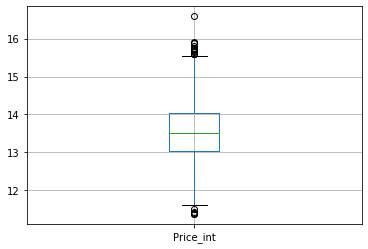

In [143]:
df.boxplot(column='Price_int')

In [144]:
# lots of outliers too. Let us explore them. 
df[df.Price_int>16]


,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage
2337,358m²,8 p.,5 p.,16 000 000,Paris 08 (75008)\nParis 8ème,Ref de l'annonce\n:NF52-6083\nChauffage\n:Indi...,75008,358,6,2,1,1,Balcon,Individuel,0,1,0,1,16.588099,0


In [145]:
#it looks like an outlier therefore let us drop it
df= df[~(df.Price_int>16)]

In [146]:
# lots of outliers too. Let us explore them.
df[df.Price_int<11.5]

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage
2143,10m²,1 p.,0 p.,91 000,Paris 10 (75010)\nParis 10ème,Ref de l'annonce\n:5370\nEtage du bien\n:6e\nN...,75010,10,6,6,0,0,0,Unknown,0,0,0,0,11.418615,1
2225,10m²,1 p.,0 p.,87 000,Paris 15 (75015)\nPARIS,Ref de l'annonce\n:216239\nChauffage\n:Individ...,75015,10,6,6,0,0,0,"Individuel, électrique",0,0,0,1,11.373663,1
2325,11m²,1 p.,0 p.,89 000,Paris 12 (75012)\nDaumesnil,Ref de l'annonce\n:30851149\nEtage du bien\n:7...,75012,11,7,7,0,0,0,Unknown,0,0,0,0,11.396392,1
2453,58m²,1 p.,0 p.,86 900,Paris 04 (75004)\nParis 4ème,Ref de l'annonce\n:227\nChauffage\n:Individuel...,75004,58,5,5,0,0,0,Individuel,0,0,0,1,11.372513,1
2506,11m²,1 p.,0 p.,98 000,Paris 12 (75012)\nPARIS,Ref de l'annonce\n:216038\nEtage du bien\n:7e\...,75012,11,7,7,0,0,0,Unknown,0,0,0,0,11.492723,1


In [147]:
# it seems that a 58m2 apartment is sold at 58000. That's very cheap, too cheap and very unusual. Let's drop it.
df.drop(2453,axis=0)

,Superficie,Rooms,Bedrooms,Price,Location,description,Loc_Paris,m2,nb_bat,nb_good,nb_bain,Cave,balc_terr,Chauffage,Rénové,Parking,Chauffage_Central,Chauffage_Individuel,Price_int,Last_etage
0,33m²,1 p.,0 p.,328 600,Paris 19 (75019)|Secrétan - Jaurès...,Ref de l'annonce\n:Grand Studio\nParking\nEtag...,75019,33,14,1,1,0,0,Unknown,0,1,0,0,12.702596,0
1,122m²,5 p.,4 p.,1 940 000,Paris 04 (75004)\nParis 4ème,Ref de l'annonce\n:158\nParking\nTerrasse/Balc...,75004,122,4,2,1,1,Terrasse,Unknown,0,1,0,0,14.478199,0
2,32m²,1 p.,0 p.,375 000,Paris 15 (75015)\nParis 15ème,Ref de l'annonce\n:162373805\nChauffage\n:Au g...,75015,32,9,8,0,1,0,Au gaz,0,0,0,0,12.834681,0
3,67m²,3 p.,2 p.,745 000,Paris 11 (75011)\nParis 11ème,Ref de l'annonce\n:1513\nChauffage\n:Individue...,75011,67,6,5,1,1,0,"Individuel, au gaz",0,0,0,1,13.521139,0
4,29m²,1 p.,0 p.,346 500,Paris 20 (75020)\nAlexandre Dumas,Ref de l'annonce\n:0147\nParking\nEtage du bie...,75020,29,5,4,0,0,0,Unknown,0,1,0,0,12.755638,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,128m²,5 p.,4 p.,1 920 000,Paris 18 (75018)\nParis 18ème,Ref de l'annonce\n:3850727\nRénové\nParking\nT...,75018,128,8,7,1,0,Terrasse,Unknown,1,1,0,0,14.467836,0
2555,56m²,3 p.,2 p.,780 000,Paris 14 (75014)\nParis 14ème,Ref de l'annonce\n:831\nEtage du bien\n:4e\nNo...,75014,56,5,4,1,1,0,Unknown,0,0,0,0,13.567049,0
2556,155m²,5 p.,4 p.,4 500 000,Paris 14 (75014)\nParis 14ème,Ref de l'annonce\n:3850545\nRénové\nChauffage\...,75014,155,6,4,1,0,"Terrasse, balcon",Central,1,1,1,0,15.319588,0
2557,107m²,3 p.,2 p.,2 850 000,Paris 14 (75014)\nParis 14ème,Ref de l'annonce\n:3850544\nRénové\nChauffage\...,75014,107,6,6,1,0,"Terrasse, balcon",Central,1,1,1,0,14.862830,1


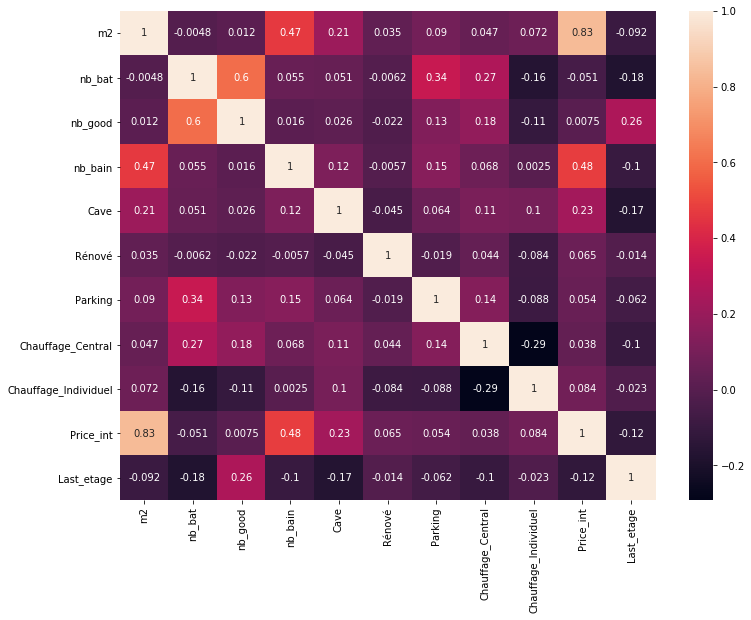

In [148]:
#Let us explore the colinearity between features.
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True)

In [149]:
#Check what is correlated with what to avoid multicolinearity
#it seems that only Price_int is highly correlated with the target feature.

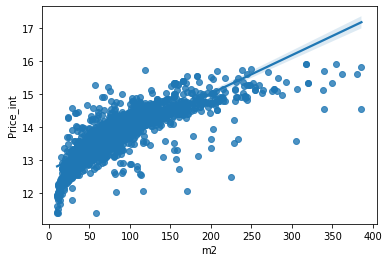

In [150]:
sns.regplot(x='m2',y='Price_int',data=df)

In [151]:
#Now let us check categorical variables

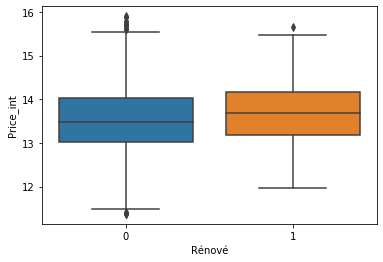

In [152]:
# Check if the feature "Rénové" has an impact on the price.
sns.boxplot(x='Rénové',y='Price_int',data=df)
# it seems it is the case whcih seems normal

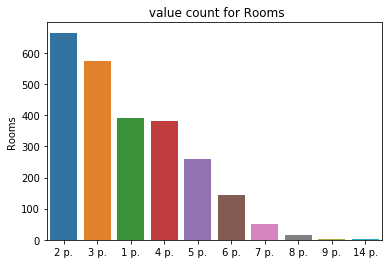

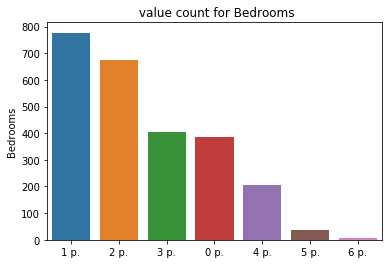

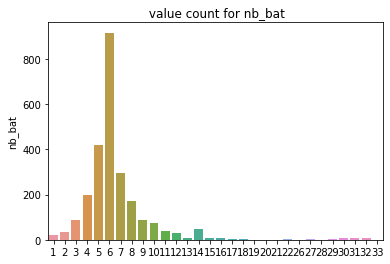

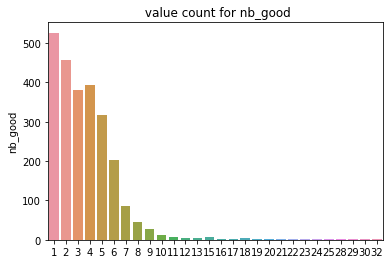

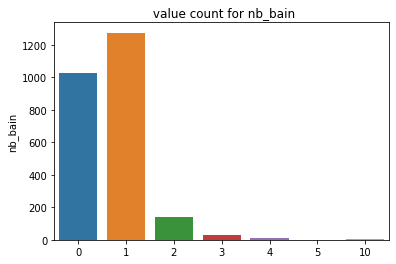

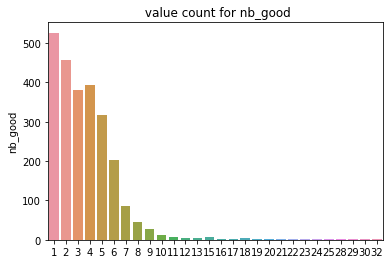

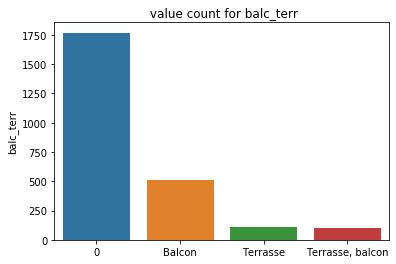

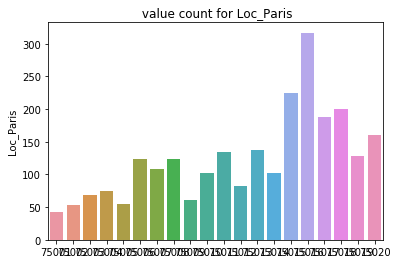

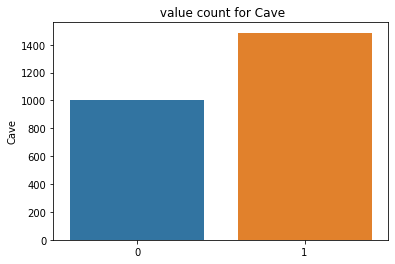

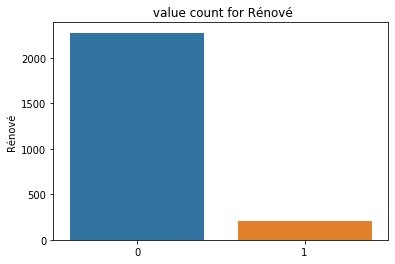

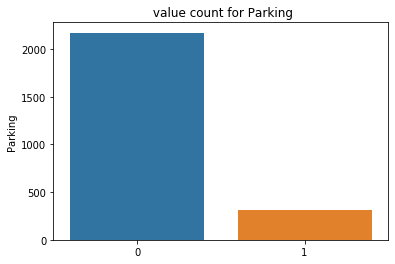

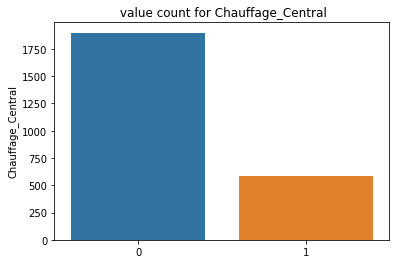

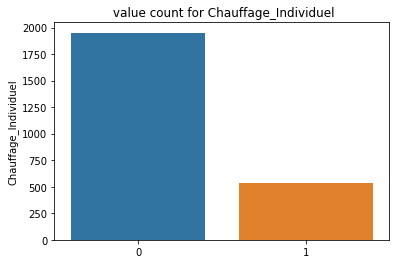

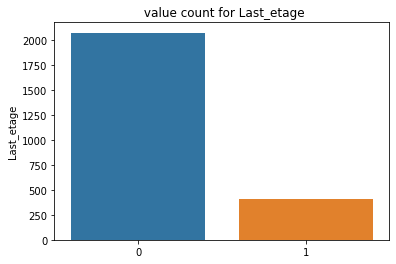

In [153]:
for i in cat:
    plt.title(f' value count for {i}')
    sns.barplot(x=df[i].value_counts().index,y=df[i].value_counts())
    plt.show()

In [154]:
pd.pivot_table(df,index='Rooms',values='Price_int',).sort_values('Price_int')

,Price_int
Rooms,
1 p.,12.622535
2 p.,13.143552
3 p.,13.615231
4 p.,13.955024
5 p.,14.325030
6 p.,14.664357
9 p.,14.843499
7 p.,14.973112
14 p.,15.118423


In [155]:
pd.pivot_table(df,index='Bedrooms',values='Price_int',).sort_values('Price_int')

,Price_int
Bedrooms,
0 p.,12.654681
1 p.,13.202649
2 p.,13.733868
3 p.,14.160415
4 p.,14.596189
5 p.,14.910423
6 p.,15.147358


In [156]:
pd.pivot_table(df,index='nb_bain',values='Price_int',).sort_values('Price_int')

,Price_int
nb_bain,
0,13.217097
1,13.678412
10,13.709038
2,14.554916
3,15.016552
4,15.215229
5,15.598902


In [157]:
pd.pivot_table(df,index=['Last_etage','Rooms'],values='Price_int',).sort_values('Price_int')

Price_int
Last_etage Rooms           
1          1 p.   12.414182
0          1 p.   12.703807
1          2 p.   13.100163
0          2 p.   13.153203
           3 p.   13.602042
1          3 p.   13.707189
0          4 p.   13.930309
1          4 p.   14.140663
           5 p.   14.303215
0          5 p.   14.328423
1          6 p.   14.628550
0          6 p.   14.670814
           9 p.   14.843499
           7 p.   14.962900
1          7 p.   15.067062
0          14 p.  15.118423
           8 p.   15.320429
1          8 p.   15.468954

In [158]:
# This is weird, I thought that a house at last etage would be more expansive than a house that is not. We need to investigate it a bit further.

In [159]:
for i in cat:
    print(i)
    print(pd.pivot_table(df,index=i,values='Price_int',).sort_values('Price_int'))

Rooms
       Price_int
Rooms           
1 p.   12.622535
2 p.   13.143552
3 p.   13.615231
4 p.   13.955024
5 p.   14.325030
6 p.   14.664357
9 p.   14.843499
7 p.   14.973112
14 p.  15.118423
8 p.   15.341647
Bedrooms
          Price_int
Bedrooms           
0 p.      12.654681
1 p.      13.202649
2 p.      13.733868
3 p.      14.160415
4 p.      14.596189
5 p.      14.910423
6 p.      15.147358
nb_bat
        Price_int
nb_bat           
14      12.768620
29      12.981462
31      13.087864
22      13.102057
28      13.151922
17      13.187295
27      13.219995
32      13.245952
2       13.347472
15      13.358858
20      13.378555
3       13.385455
30      13.392039
18      13.441300
4       13.442823
1       13.443903
16      13.485333
33      13.500800
5       13.502960
21      13.526494
13      13.530130
11      13.552652
6       13.627262
10      13.634440
26      13.641157
12      13.641407
7       13.646034
8       13.649253
9       13.729686
19      14.027391
nb_good
         P

In [160]:
#transform the feature loc_Paris 
df.Loc_Paris=df.Loc_Paris.apply(lambda x: int(x)-75000)

In [161]:
df.to_csv('final_data.csv',index=False)